## Import libraries and load data

In [4]:
import pandas as pd
import pathlib
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get path to train file
path = os.path.join(pathlib.Path.cwd(), "raw", "train.csv")
path

'c:\\Users\\bogus\\Desktop\\Projects\\Kaggle competitions\\Introverts\\data\\train.csv'

In [6]:
train_df = pd.read_csv(path, index_col=0)
train_df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [7]:
# Variables split
categorical_variables = ["Stage_fear", "Drained_after_socializing"]
numerical_variables = ["Time_spent_Alone", "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency"]
y_variable = "Personality"

## Basic statistics

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [9]:
train_df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [10]:
train_df.nunique()

Time_spent_Alone             12
Stage_fear                    2
Social_event_attendance      11
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          16
Post_frequency               11
Personality                   2
dtype: int64

In [11]:
train_df[categorical_variables] = train_df[categorical_variables].astype('category')
train_df[y_variable] = train_df[y_variable].astype('category')

In [12]:
train_df[y_variable].value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

Dataset is imbalanced

## Correlations

In [13]:
df_to_corr = pd.concat([
    train_df[numerical_variables], 
    *[train_df[var].cat.codes for var in categorical_variables],
    train_df[y_variable].cat.codes
], axis=1)
df_to_corr.columns = numerical_variables + categorical_variables + [y_variable]
df_to_corr.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
id,,,,,,,,
0,0.0,6.0,4.0,15.0,5.0,0,0,0
1,1.0,7.0,3.0,10.0,8.0,0,0,0
2,6.0,1.0,0.0,3.0,0.0,1,-1,1
3,3.0,7.0,3.0,11.0,5.0,0,0,0
4,1.0,4.0,4.0,13.0,NaN,0,0,0


<Axes: >

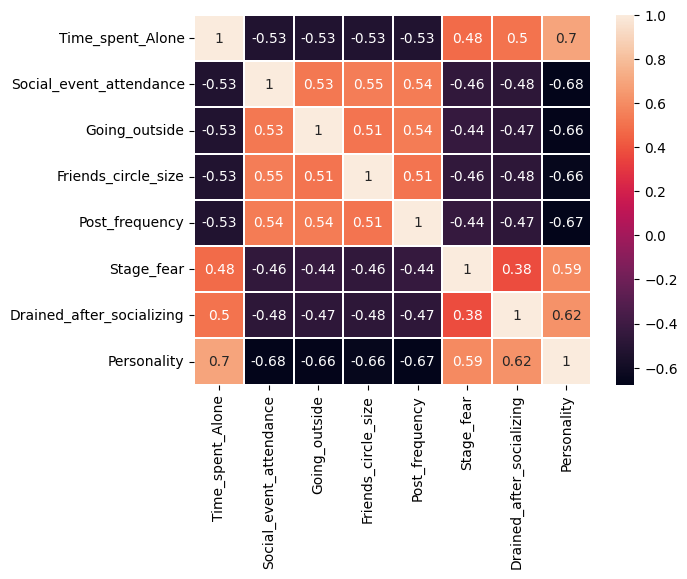

In [14]:
sns.heatmap(df_to_corr.corr(method="spearman"), annot=True, linewidths=0.1)

## Pair plots

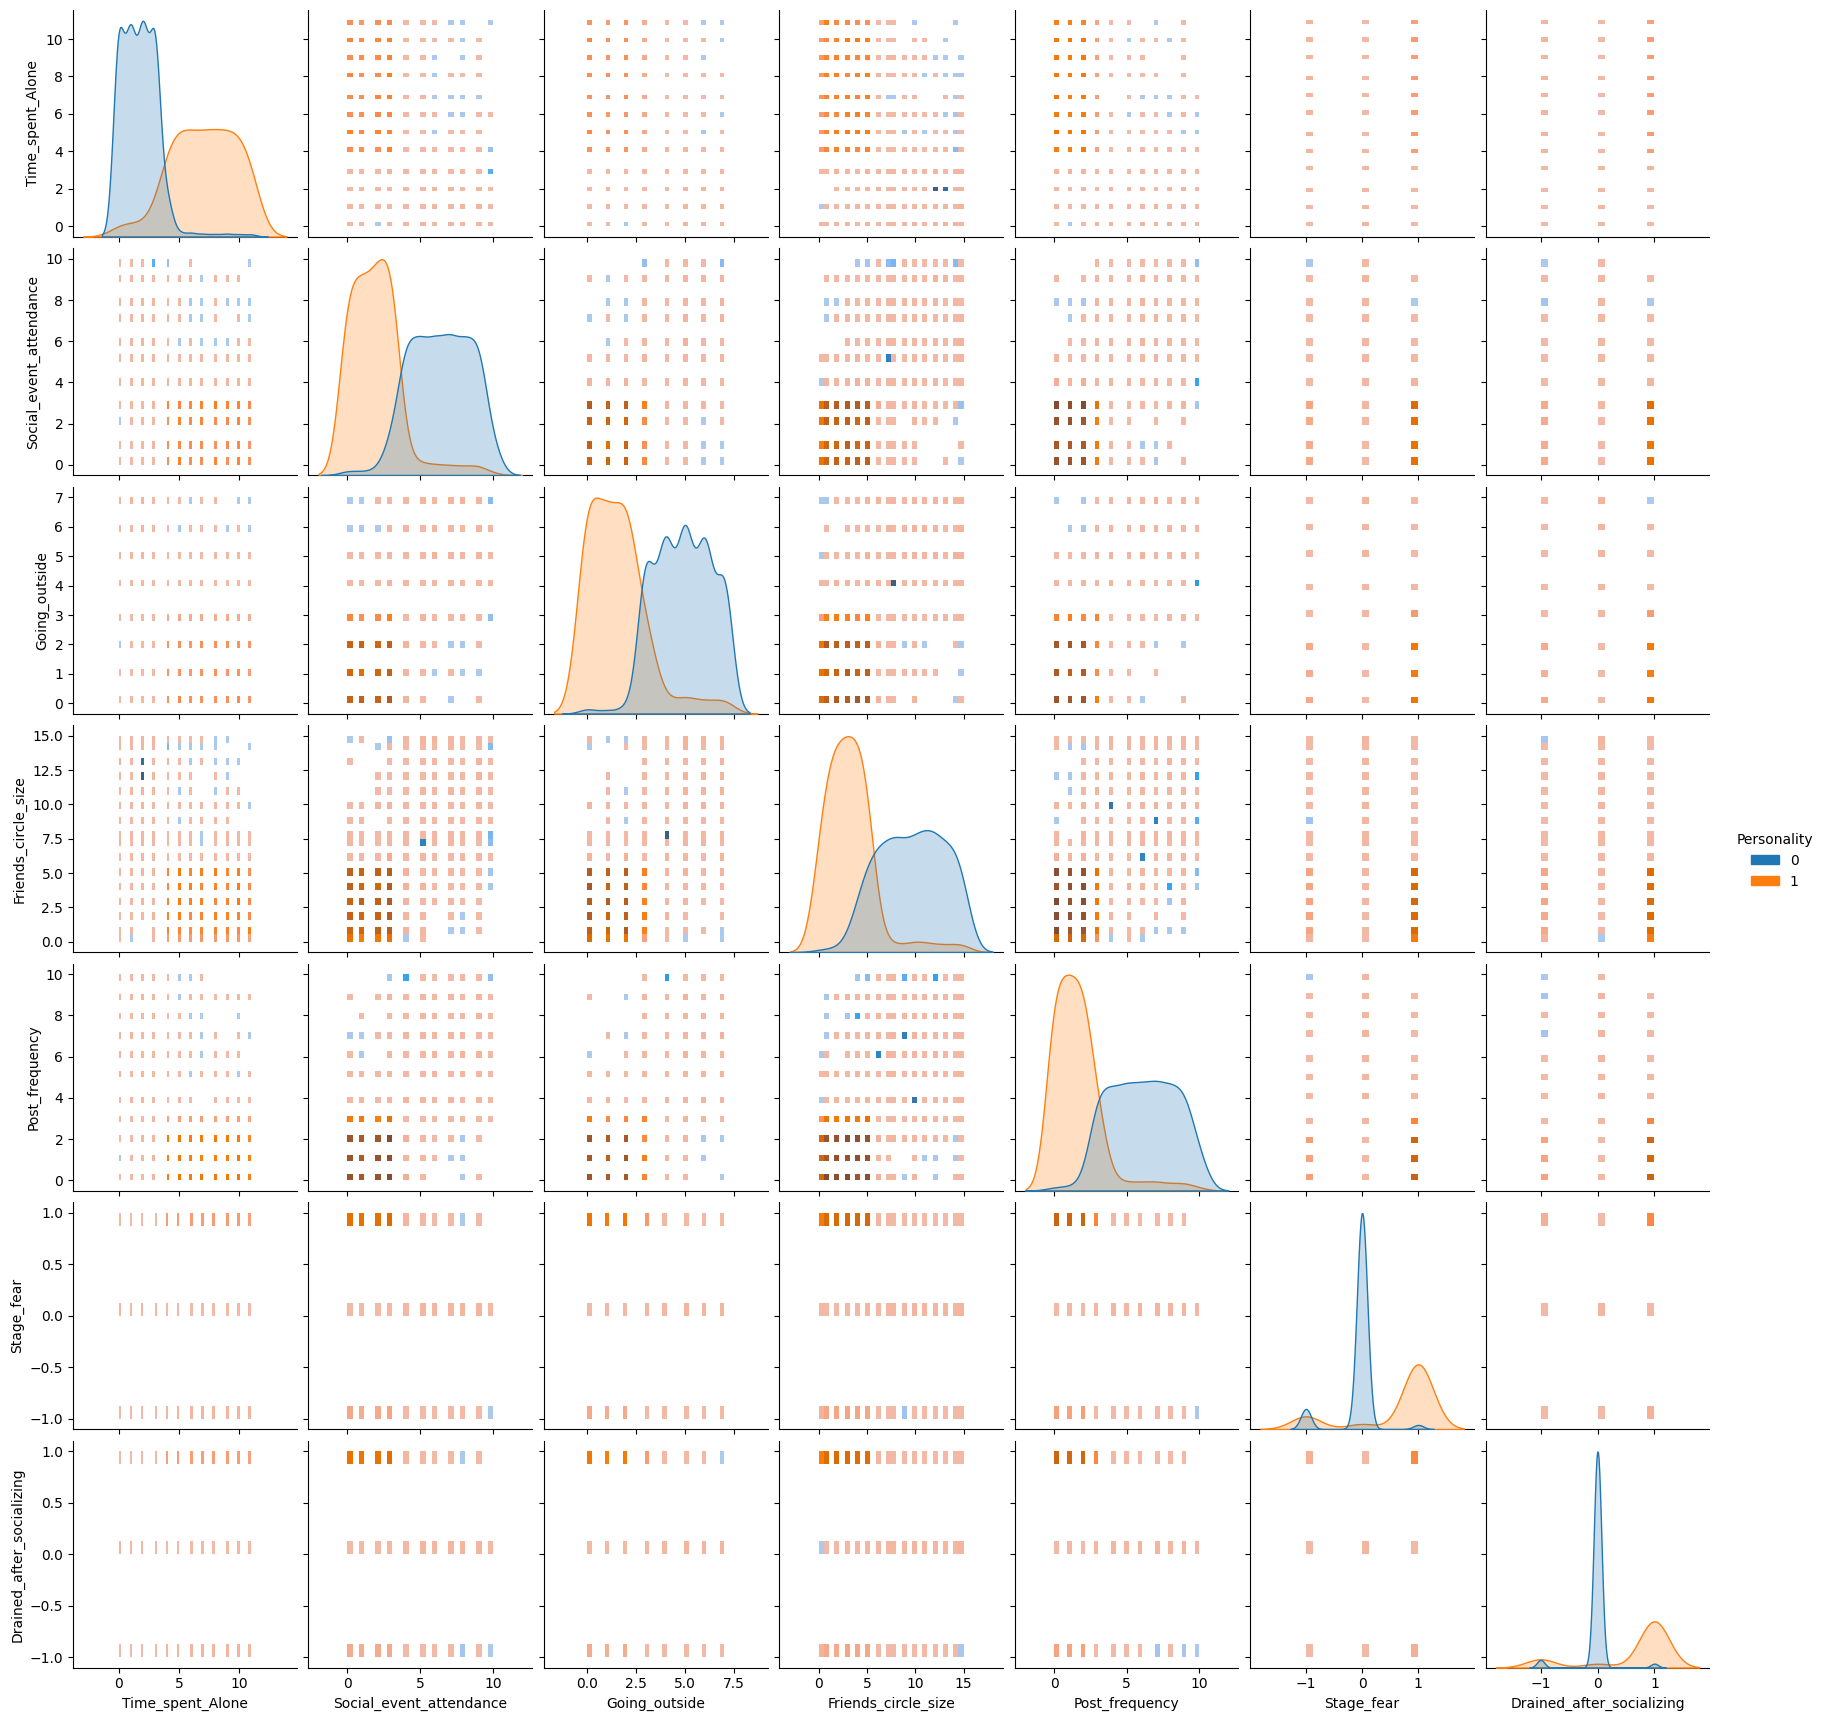

In [15]:
sns.pairplot(
    df_to_corr,
    kind="hist",
    diag_kind="kde",
    hue="Personality",
    diag_kws = {"bw_adjust": 2, "common_norm": False}
)
plt.show()

## Plots by Personality

In [16]:
len(numerical_variables)

5

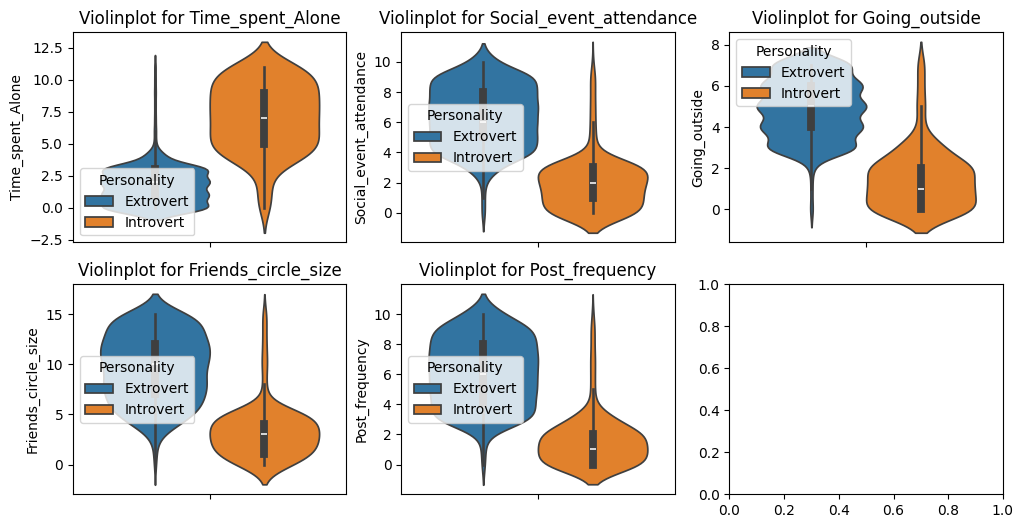

In [17]:
# violin plots for numerical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axs = axs.flatten()
for i, var in enumerate(numerical_variables):
    ax = axs[i]
    sns.violinplot(
        # y=train_df[var],
        hue=train_df[y_variable],
        y=train_df[var],
        bw_adjust=2,
        common_norm=False,
        ax=ax
    )
    ax.set_title(f"Violinplot for {var}")
plt.show()

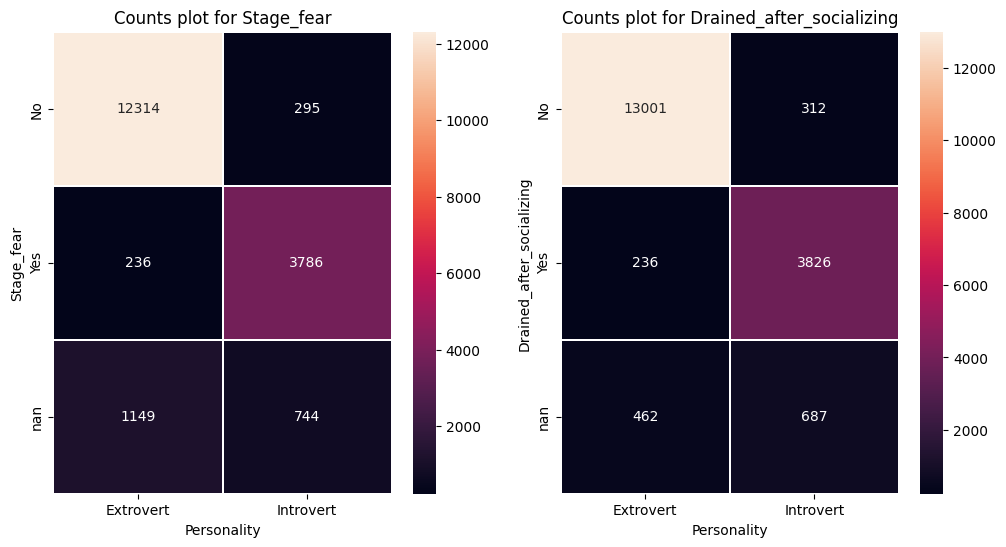

In [18]:
# xxx plots for categorical variables
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
for i, var in enumerate(categorical_variables):
    sns.heatmap(
        pd.crosstab(train_df[var].astype(str), train_df[y_variable]),
        annot=True,
        linewidths=0.1,
        fmt='d',
        ax=axs[i]
    )
    axs[i].set_title(f"Counts plot for {var}")
    
plt.show()

## Pairwise distributions

In [19]:
columns = train_df.columns[:-1]

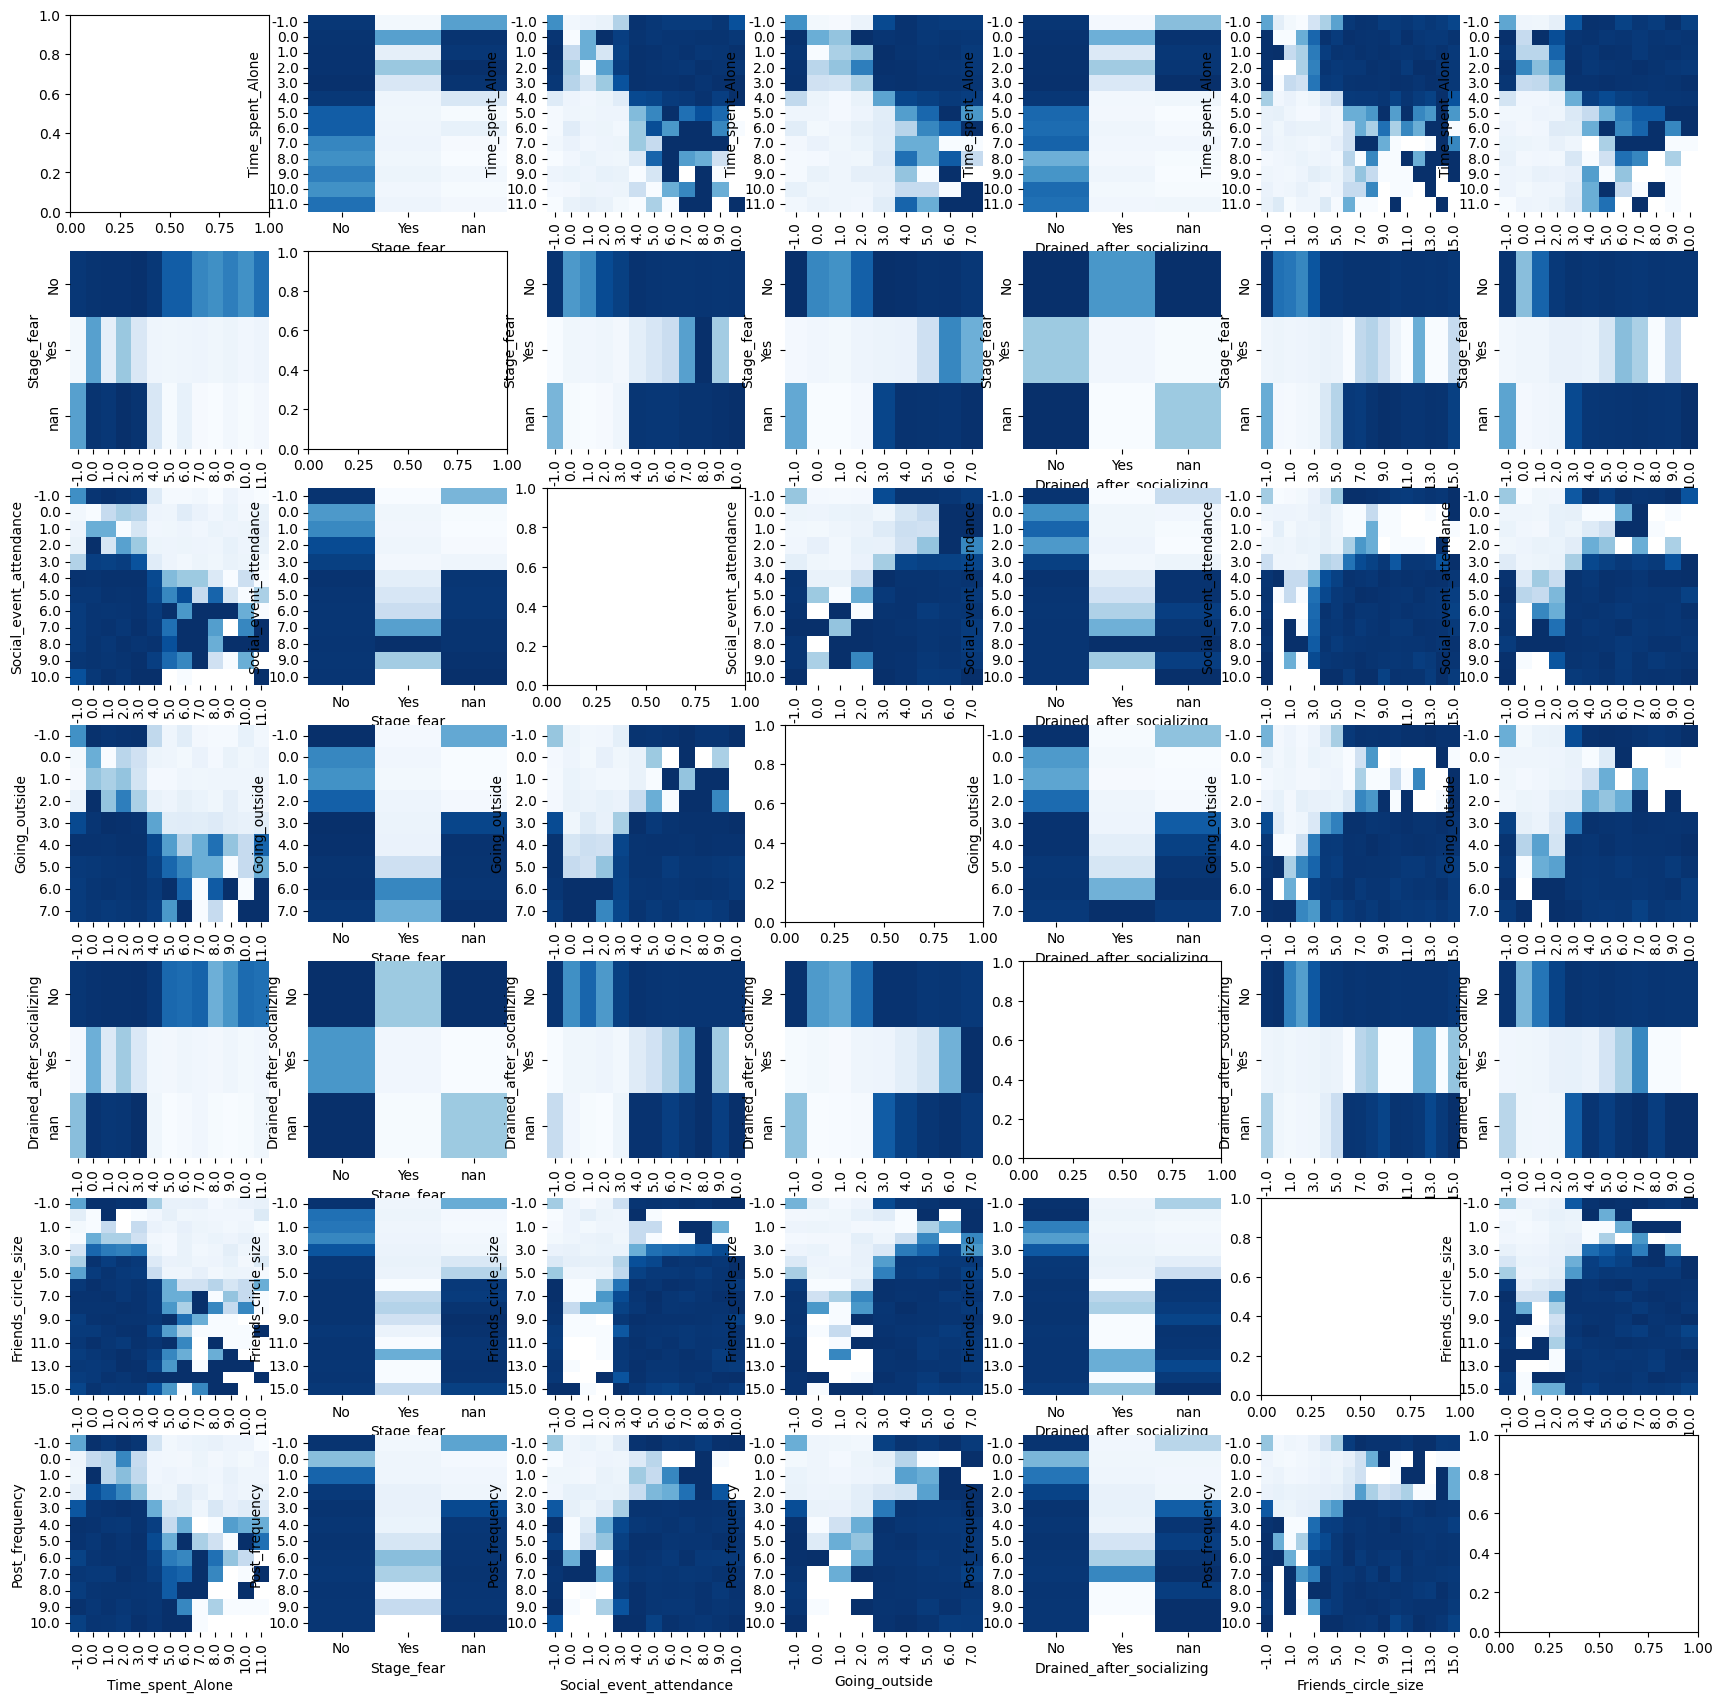

In [35]:
fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(21, 21))
y_values = train_df[y_variable]
for row, row_var in enumerate(columns):
    row_values = train_df[row_var]
    if pd.api.types.is_numeric_dtype(row_values):
        row_values = row_values.fillna(-1.)
    else:
        row_values = row_values.astype(str)
    
    for col, col_var in enumerate(columns):
        col_values = train_df[col_var]
        if row > col:
            if pd.api.types.is_numeric_dtype(col_values):
                col_values = col_values.fillna(-1.)
            else:
                col_values = col_values.astype(str)
            temp_df = pd.concat([row_values, col_values, y_values], axis=1)
            grouped = temp_df.groupby([row_var, col_var], observed=False)[y_variable] \
                .agg(
                    probability=lambda x: (x == "Extrovert").mean()
                ) \
                .reset_index()
            pivoted = grouped.pivot(index=row_var, columns=col_var, values="probability")
            sns.heatmap(pivoted, cmap="Blues", ax=axs[row, col], cbar=False)
            # axs[row, col].set_title(f"{row_var} vs {col_var}")
            sns.heatmap(pivoted.transpose(), cmap="Blues", ax=axs[col, row], cbar=False)
            # axs[col, row].set_title(f"{col_var} vs {row_var}")
plt.show()